Praktikum Week 6
Ricky Jonathan H. T - 0706022210005


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Step 2: Load dataset dari URL
url = "https://raw.githubusercontent.com/rickyjooooooe/DATASET/refs/heads/main/adult.csv"
data = pd.read_csv(url)  # Membaca file CSV dan memuatnya sebagai DataFrame
print("Data Sample:")
data.sample(n=10)

Data Sample:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
34865,33,Private,268147,9th,5,Never-married,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
41359,74,Private,260669,10th,6,Divorced,Other-service,Not-in-family,White,Female,0,0,1,United-States,<=50K
43918,39,Private,115289,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,France,>50K
46060,42,Private,37937,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,45,United-States,<=50K
7902,51,Local-gov,250054,Some-college,10,Widowed,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
39926,22,Private,199336,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,25,United-States,<=50K
26015,35,Private,117381,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,8614,0,45,United-States,>50K
21864,27,Private,329005,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
6846,76,Local-gov,224058,10th,6,Divorced,Transport-moving,Not-in-family,Black,Male,0,0,20,United-States,<=50K
18182,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Menampilkan jumlah nilai unik
data['income'].value_counts(dropna=False)



,count
income,
<=50K,37155
>50K,11687


In [10]:
data.isnull().sum()





,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


<ipython-input-12-46e6fd7ee657>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='income', palette='pastel')


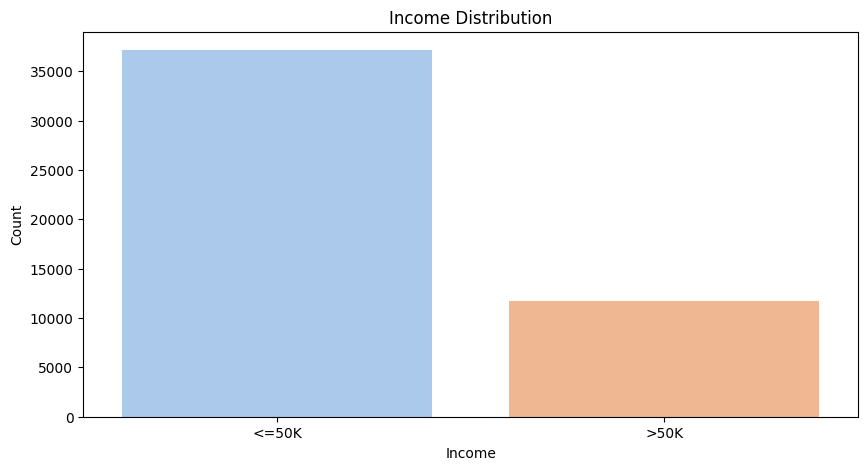

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data, x='income', palette='pastel')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

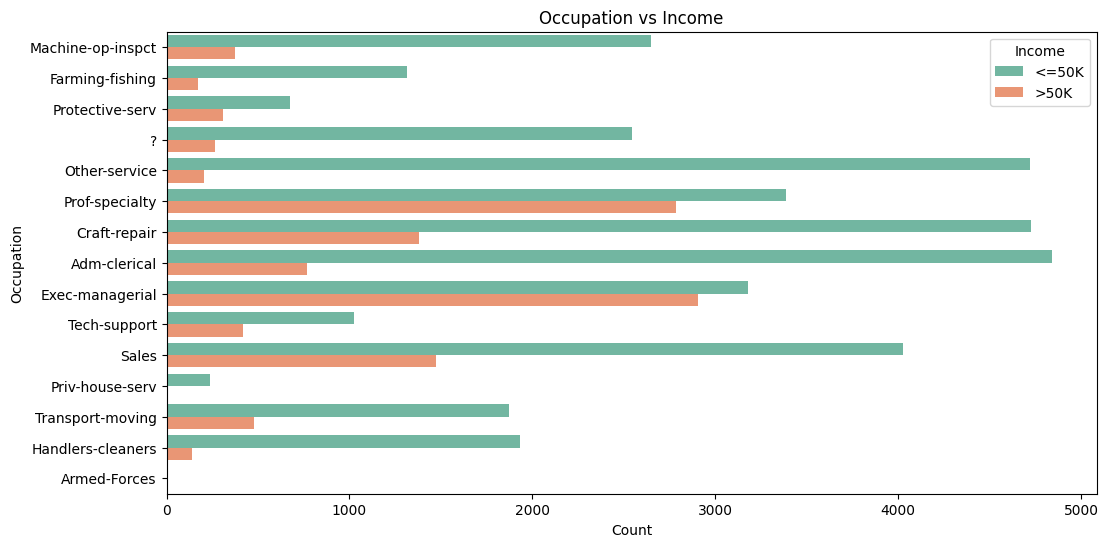

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data, y='occupation', hue='income', palette='Set2')
plt.title('Occupation vs Income')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Income')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['marital-status'] = label_encoder.fit_transform(data['marital-status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['race'] = label_encoder.fit_transform(data['race'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['native-country'] = label_encoder.fit_transform(data['native-country'])

# Display the encoded DataFrame
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,<=50K
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,<=50K
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,>50K
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,>50K
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,<=50K


In [19]:
data['income'] = label_encoder.fit_transform(data['income'])
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


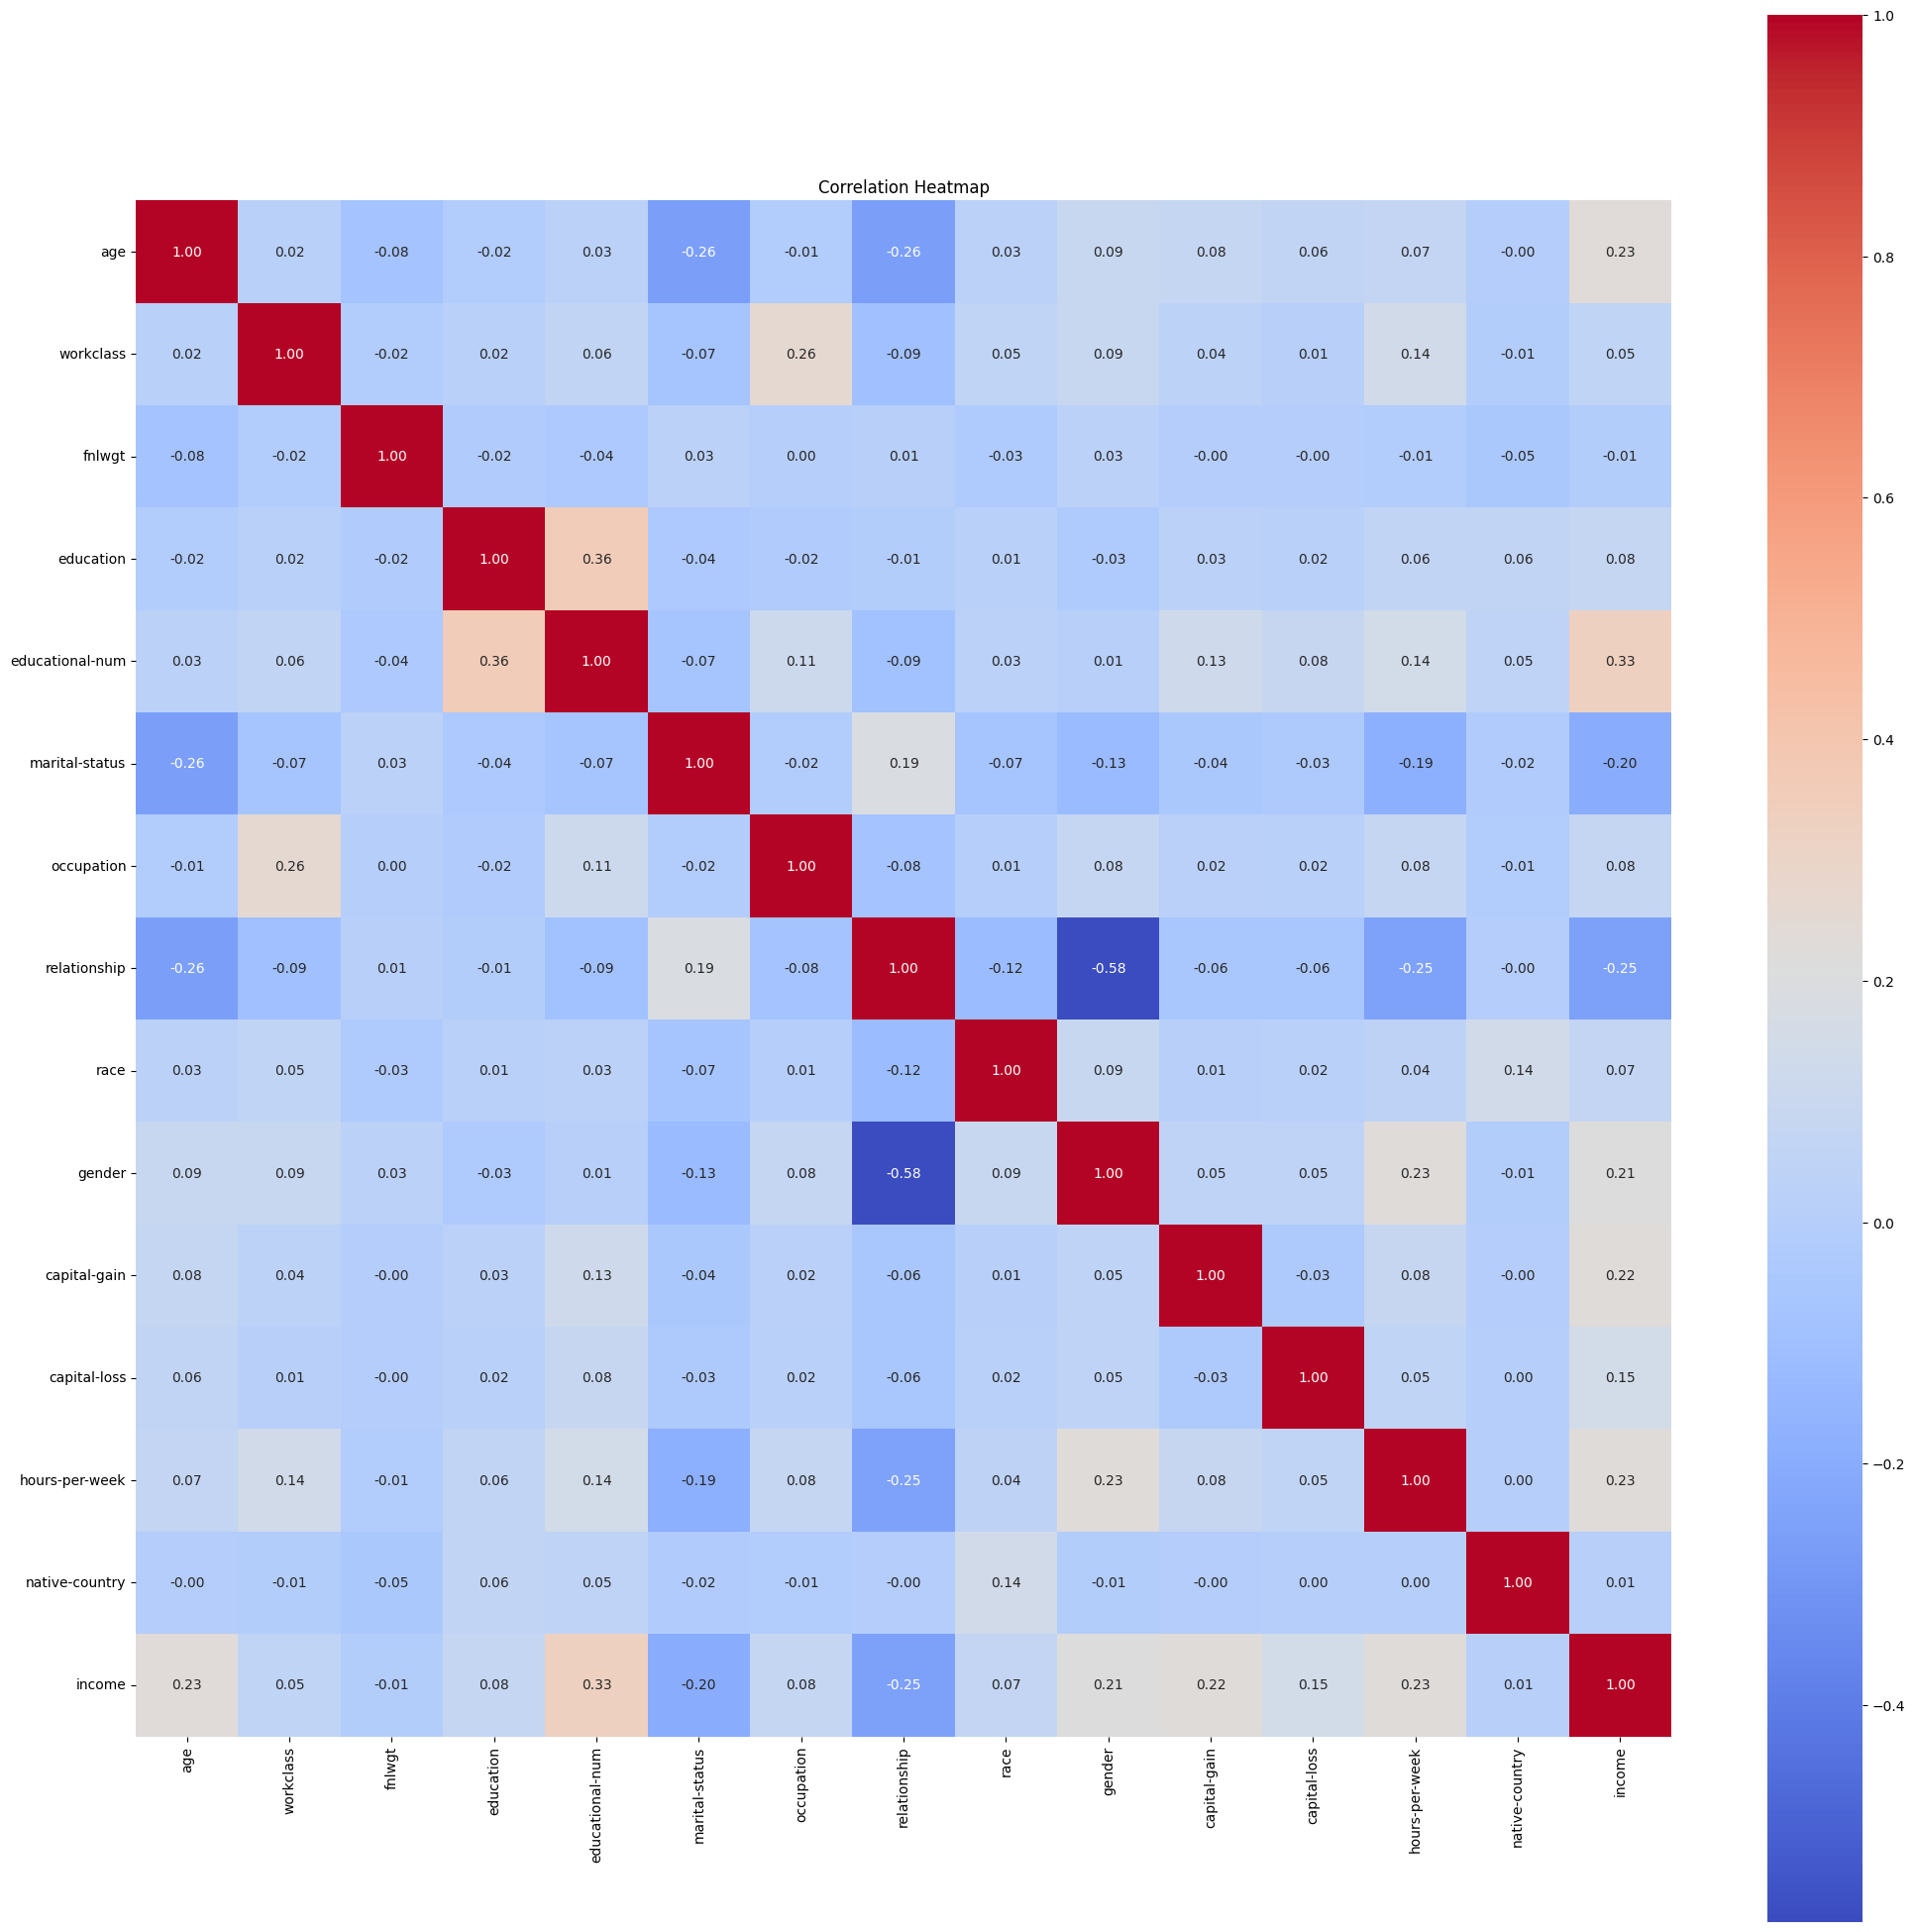

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Decision Tree


Training set shape: (39073, 12), Testing set shape: (9769, 12)
Accuracy with Entropy criterion: 0.8449
Training accuracy (Entropy): 0.8384


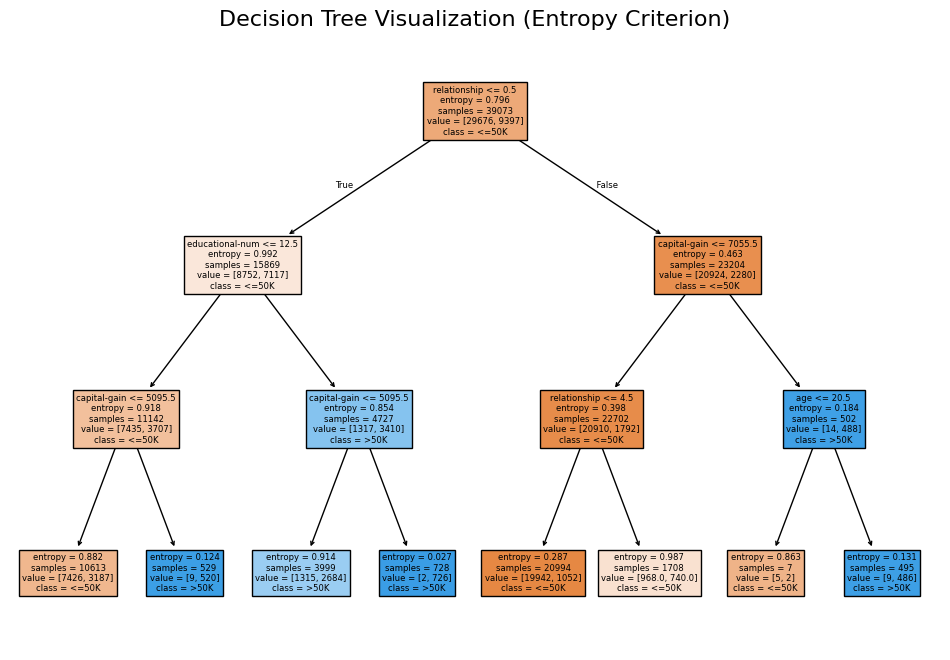

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your DataFrame
# Assuming your DataFrame is named 'data'
X = data.drop(['income', 'fnlwgt', 'native-country'], axis=1)  # Features
y = data['income']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing datasets
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')

# 1. Decision Tree Classification using Entropy
# Create and fit the model
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
entropy_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_entropy = entropy_model.predict(X_test)

# Calculate accuracy for both training and test sets
train_accuracy_entropy = accuracy_score(y_train, entropy_model.predict(X_train))
test_accuracy_entropy = accuracy_score(y_test, predictions_entropy)

print(f'Accuracy with Entropy criterion: {test_accuracy_entropy:.4f}')
print(f'Training accuracy (Entropy): {train_accuracy_entropy:.4f}')

# Classification report for the entropy model
print("\nClassification Report (Entropy Criterion):")
print(classification_report(y_test, predictions_entropy))

# Visualizing the decision tree for the entropy model
plt.figure(figsize=(12, 8))
tree.plot_tree(entropy_model, feature_names=X.columns, class_names=["<=50K", ">50K"], filled=True)
plt.title('Decision Tree Visualization (Entropy Criterion)', fontsize=16)
plt.show()

Accuracy with Gini criterion: 0.8449
Training accuracy (Gini): 0.8384


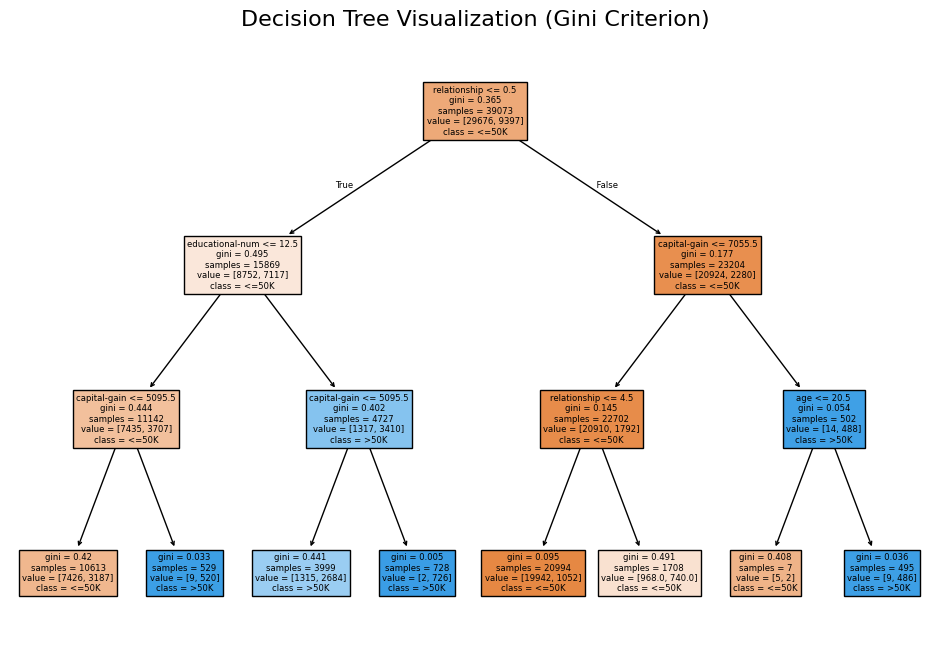

In [26]:
# 2. Decision Tree Classification using Gini
# Create and fit the Gini model
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
gini_model.fit(X_train, y_train)

# Make predictions on the test set using the Gini model
predictions_gini = gini_model.predict(X_test)

# Calculate accuracy for both training and test sets
train_accuracy_gini = accuracy_score(y_train, gini_model.predict(X_train))
test_accuracy_gini = accuracy_score(y_test, predictions_gini)

print(f'Accuracy with Gini criterion: {test_accuracy_gini:.4f}')
print(f'Training accuracy (Gini): {train_accuracy_gini:.4f}')

# Classification report for the Gini model
print("\nClassification Report (Gini Criterion):")
print(classification_report(y_test, predictions_gini))

# Visualizing the decision tree for the Gini model
plt.figure(figsize=(12, 8))
tree.plot_tree(gini_model, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.title('Decision Tree Visualization (Gini Criterion)', fontsize=16)
plt.show()

Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [37]:
# Predicting with Naive Bayes
y_pred_nb = nb_model.predict(X_test)


In [42]:
# Accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")



Naive Bayes Accuracy: 0.8053024874603337


In [43]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix (Naive Bayes):\n{cm_nb}")


Confusion Matrix (Naive Bayes):
[[7128  351]
 [1551  739]]


In [44]:
# Classification Report for Naive Bayes
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.68      0.32      0.44      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.79      0.81      0.78      9769



SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Prediksi menggunakan model SVM
y_pred_svm = svm_model.predict(X_test)

# Menghitung akurasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Menampilkan confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Confusion Matrix (SVM):\n{cm_svm}")

# Menampilkan classification report untuk SVM
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))
